In [0]:
import pandas as pd
import datetime as dt
# import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
from dateutil import relativedelta

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

import plotly.express as px

from azure.cosmosdb.table.tableservice import TableService
from azure.cosmosdb.table.models import Entity

import pickle

def get_data_from_table_storage_table(table_service, source_table, filter_query):
    """ Retrieve data from Table Storage """
    for record in table_service.query_entities(source_table, filter=filter_query):
        yield record
  
def set_table_service(storage_account_name: str, account_key: str):
    """ Set the Azure Table Storage service """
    return TableService(account_name=storage_account_name, account_key=account_key)

def get_data(table_service: str, source_table: str, filter_query: str):
    return get_dataframe_from_table_storage_table(table_service, source_table, filter_query)

def get_dataframe_from_table_storage_table(table_service: str, source_table: str, filter_query: str):
    """ Create a dataframe from table storage data """
    return spark.createDataFrame(get_data_from_table_storage_table(table_service, source_table, filter_query))

def loading_dcs_data(last_n_hours, columns_of_interest, rename_dict):
    pgl_storage_account_name = 'pgldatalake'
    pgl_account_key = 'xAra5DFz1dX4t8b131wxxJ8pTCntBOjMFUrxYIg60nwkFhCohFERqJbkfoMNnLyqAg6IzSe2IQeNZSV3Z+c88g=='

    shk_storage_account_name = 'shikharanalyticsdevstore'
    shk_account_key = '9xzNHW65P7AfzuouxFW4MQICKW6DAYskfIABi/YobTfFraH4ODihAxrMWryv/LcwV1PPOACDZ3jqRRu0J27dDg=='
    
    pgl_table_service = set_table_service(pgl_storage_account_name, pgl_account_key)
    last_ts = str(dt.datetime.now() - timedelta(hours=last_n_hours)).replace(' ','T') + 'Z'
    filter_query = "Timestamp ge datetime'{}'".format(last_ts)
    df = get_data(pgl_table_service, 'DCS255TPD', filter_query).toPandas()
    df['DateTime'] = df['DateTime'] + timedelta(hours = 5, minutes = 30)
    df_v2 = df.set_index('DateTime')[columns_of_interest].rename(columns = rename_dict).sort_index()
    df_v2['Date'] = df_v2.index.date
    df_v2
    return df_v2

In [0]:
pgl_storage_account_name = 'pgldatalake'
pgl_account_key = 'xAra5DFz1dX4t8b131wxxJ8pTCntBOjMFUrxYIg60nwkFhCohFERqJbkfoMNnLyqAg6IzSe2IQeNZSV3Z+c88g=='

shk_storage_account_name = 'shikharanalyticsdevstore'
shk_account_key = '9xzNHW65P7AfzuouxFW4MQICKW6DAYskfIABi/YobTfFraH4ODihAxrMWryv/LcwV1PPOACDZ3jqRRu0J27dDg=='

pgl_table_service = set_table_service(pgl_storage_account_name, pgl_account_key)
# last_ts = str(dt.datetime.now() - timedelta(hours=last_n_hours)).replace(' ','T') + 'Z'
last_ts = "2020-11-01T00:00:00.000000Z"
filter_query = "Timestamp ge datetime'{}'".format(last_ts)
df = get_data(pgl_table_service, 'DCS255TPD', filter_query).toPandas()
df['DateTime'] = df['DateTime'] + timedelta(hours = 5, minutes = 30)

In [0]:
pgl_storage_account_name = 'pgldatalake'
pgl_account_key = 'xAra5DFz1dX4t8b131wxxJ8pTCntBOjMFUrxYIg60nwkFhCohFERqJbkfoMNnLyqAg6IzSe2IQeNZSV3Z+c88g=='

shk_storage_account_name = 'shikharanalyticsdevstore'
shk_account_key = '9xzNHW65P7AfzuouxFW4MQICKW6DAYskfIABi/YobTfFraH4ODihAxrMWryv/LcwV1PPOACDZ3jqRRu0J27dDg=='

pgl_table_service = set_table_service(pgl_storage_account_name, pgl_account_key)
# last_ts = str(dt.datetime.now() - timedelta(hours=last_n_hours)).replace(' ','T') + 'Z'
last_ts = "2020-11-01T00:00:00.000000Z"
filter_query = "Timestamp ge datetime'{}'".format(last_ts)
df = get_data(pgl_table_service, 'DCS160TPD', filter_query).toPandas()
df['DateTime'] = df['DateTime'] + timedelta(hours = 5, minutes = 30)
df[[col for col in df.columns if "PIDE03SPO" in col.upper()]].describe()

PIDE03SPOPR 
 
 
 
 
 count 
 31554.000000 
 
 
 mean 
 1176.639475 
 
 
 std 
 32.932451 
 
 
 min 
 50.000000 
 
 
 25% 
 1153.000000 
 
 
 50% 
 1187.000000 
 
 
 75% 
 1198.000000 
 
 
 max 
 1235.000000

In [0]:
pgl_storage_account_name = 'pgldatalake'
pgl_account_key = 'xAra5DFz1dX4t8b131wxxJ8pTCntBOjMFUrxYIg60nwkFhCohFERqJbkfoMNnLyqAg6IzSe2IQeNZSV3Z+c88g=='

shk_storage_account_name = 'shikharanalyticsdevstore'
shk_account_key = '9xzNHW65P7AfzuouxFW4MQICKW6DAYskfIABi/YobTfFraH4ODihAxrMWryv/LcwV1PPOACDZ3jqRRu0J27dDg=='

pgl_table_service = set_table_service(pgl_storage_account_name, pgl_account_key)
# last_ts = str(dt.datetime.now() - timedelta(hours=last_n_hours)).replace(' ','T') + 'Z'
last_ts = "2020-11-01T00:00:00.000000Z"
filter_query = "Timestamp ge datetime'{}'".format(last_ts)
df = get_data(pgl_table_service, 'DCS95TPD', filter_query).toPandas()
df['DateTime'] = df['DateTime'] + timedelta(hours = 5, minutes = 30)
df[[col for col in df.columns if "FTMGF" in col.upper()]].describe()

FTMGFAI14 
 FTMGFSPOPR 
 
 
 
 
 count 
 37815.000000 
 25760.000000 
 
 
 mean 
 717.493131 
 730.566227 
 
 
 std 
 79.433410 
 48.744148 
 
 
 min 
 0.950908 
 670.000000 
 
 
 25% 
 713.027527 
 711.000000 
 
 
 50% 
 729.469055 
 729.000000 
 
 
 75% 
 746.462708 
 750.000000 
 
 
 max 
 872.013245 
 7230.000000

In [0]:
pgl_storage_account_name = 'pgldatalake'
pgl_account_key = 'xAra5DFz1dX4t8b131wxxJ8pTCntBOjMFUrxYIg60nwkFhCohFERqJbkfoMNnLyqAg6IzSe2IQeNZSV3Z+c88g=='

shk_storage_account_name = 'shikharanalyticsdevstore'
shk_account_key = '9xzNHW65P7AfzuouxFW4MQICKW6DAYskfIABi/YobTfFraH4ODihAxrMWryv/LcwV1PPOACDZ3jqRRu0J27dDg=='

pgl_table_service = set_table_service(pgl_storage_account_name, pgl_account_key)
# last_ts = str(dt.datetime.now() - timedelta(hours=last_n_hours)).replace(' ','T') + 'Z'
last_ts = "2020-11-01T00:00:00.000000Z"
filter_query = "Timestamp ge datetime'{}'".format(last_ts)
df = get_data(pgl_table_service, 'DCS60TPD', filter_query).toPandas()
df['DateTime'] = df['DateTime'] + timedelta(hours = 5, minutes = 30)
df[[col for col in df.columns if "FTMGFSV" in col.upper()]].describe()

MelterGasflowsetvalueFTMGFSVDB202DD20 
 
 
 
 
 count 
 37949.000000 
 
 
 mean 
 491.195078 
 
 
 std 
 17.114585 
 
 
 min 
 435.000000 
 
 
 25% 
 480.000000 
 
 
 50% 
 490.000000 
 
 
 75% 
 503.000000 
 
 
 max 
 545.000000

In [0]:
df.loc[df['DateTime']>='2020-11-06'][['DateTime','PIDE87SPOPR','MGFT221AI18']].sort_values(by = ['DateTime'])

DateTime 
 PIDE87SPOPR 
 MGFT221AI18 
 
 
 
 
 1092 
 2020-11-06 00:00:04.323 
 1210.0 
 1208.963745 
 
 
 1091 
 2020-11-06 00:01:04.370 
 1210.0 
 1214.381104 
 
 
 1090 
 2020-11-06 00:02:04.373 
 1210.0 
 1210.079834 
 
 
 1089 
 2020-11-06 00:03:04.327 
 1210.0 
 1217.415283 
 
 
 1088 
 2020-11-06 00:04:04.377 
 1210.0 
 1211.524780 
 
 
 ... 
 ... 
 ... 
 ... 
 
 
 4 
 2020-11-06 18:08:04.330 
 1235.0 
 1235.373169 
 
 
 3 
 2020-11-06 18:09:04.327 
 1235.0 
 1235.010620 
 
 
 2 
 2020-11-06 18:10:04.327 
 1235.0 
 1229.402344 
 
 
 1 
 2020-11-06 18:11:04.323 
 1235.0 
 1234.232178 
 
 
 0 
 2020-11-06 18:12:04.323 
 1235.0 
 1235.241943 
 
 
 
 1093 rows × 3 columns

In [0]:
np.abs(df['PIDE87SPOPR'] - df['MGFT221AI18']).mean()

Out[16]: 74.65906032054654

In [0]:
df[['DateTime','PIDE87SPOPR','MGFT221AI18']].describe()

PIDE87SPOPR 
 MGFT221AI18 
 
 
 
 
 count 
 1860.000000 
 7921.000000 
 
 
 mean 
 1204.987634 
 1128.272103 
 
 
 std 
 18.278856 
 254.534704 
 
 
 min 
 1100.000000 
 3.208888 
 
 
 25% 
 1190.000000 
 1174.351318 
 
 
 50% 
 1200.000000 
 1190.941772 
 
 
 75% 
 1222.000000 
 1211.339844 
 
 
 max 
 1237.000000 
 1320.165894

In [0]:
df["AirFlow"] = df[["CABFT211AI12", "CABFT212AI13"]].apply(max, axis=1)
df["Date"] = df["DateTime"].dt.date
df.rename(columns = {"TE204TC22":"MelterCrownData",
    "MGFT221AI18":"FuelFlow",
        "FPT211AI23":"FurnacePressure",
            "TE207TC25":"MelterBottom",
                "TE101TC10":"FlueTemperature"}, inplace = True)

df_v2 = df[['DateTime','Date','AirFlow','MelterCrownData','FuelFlow','FurnacePressure','MelterBottom','FlueTemperature']]
df_v2.head(4)

DateTime 
 Date 
 AirFlow 
 MelterCrownData 
 FuelFlow 
 FurnacePressure 
 MelterBottom 
 FlueTemperature 
 
 
 
 
 0 
 2020-10-20 19:58:31.477 
 2020-10-20 
 15392.607422 
 1574.306885 
 1176.719116 
 0.335811 
 1088.468750 
 348.299988 
 
 
 1 
 2020-10-20 19:57:31.473 
 2020-10-20 
 15414.105469 
 1574.014038 
 1189.549072 
 0.202844 
 1088.644897 
 347.600006 
 
 
 2 
 2020-10-20 19:56:31.473 
 2020-10-20 
 15287.646484 
 1573.987671 
 1187.353760 
 0.090751 
 1088.514404 
 346.600006 
 
 
 3 
 2020-10-20 19:55:31.473 
 2020-10-20 
 15445.087891 
 1573.752075 
 1190.874756 
 0.030976 
 1088.443726 
 346.200012

In [0]:
df_v2.sort_values(by = 'DateTime').to_csv('/dbfs/mnt/datalake/exploratory/Furnace_Analytics/265TPD/dcs_df_20201001_to_20201020.csv')

In [0]:
df_v2 = (df[['DateTime',"MelterGasflowvalueFTMGFPVDB202DD92","SecondaryAirFlowvalueFTSAFPVDB205DD92",
     "ThermocoupleMelterCrown1TCMC1PVDB249DD54","ThermocoupleMelterCrown2TCMC2PVDB249DD128","ThermocoupleMelterCrown3TCMC3PVDB249DD202",
    "FurnacepressurevalueDPTFURPVDB244DD498","ThermocoupleFluePassLeftInnerTCFPLIPVDB249DD942","ThermocoupleFluePassLeftOuterTCFPLOPVDB249DD1164",
     "ThermocoupleFluePassRightInnerTCFPRIPVDB249DD1016","ThermocoupleFluePassRightOuterTCFPROPVDB249DD1090",
     "ThermocoupleMelterBottom1TCMB1PVDB249DD424","ThermocoupleMelterBottom2TCMB2PVDB249DD498","ThermocoupleMelterBottom3TCMB3PVDB249DD572",
     "ThermocoupleregenratoreCrownleftTCRCLPVDB249DD794","ThermocoupleregenratoreCrownrightTCRCRPVDB249DD868",
             'ThermocoupleMelterBottom4TCMB4PVDB249DD646','ThermocoupleMelterBottom5TCMB5PVDB249DD720'
    ]]
 .rename(columns = {'MelterGasflowvalueFTMGFPVDB202DD92':'Fuel flow',
          "SecondaryAirFlowvalueFTSAFPVDB205DD92":"Air flow",
          "ThermocoupleMelterCrown1TCMC1PVDB249DD54":"MCT 1",
          "ThermocoupleMelterCrown2TCMC2PVDB249DD128":"MCT 2",
          "ThermocoupleMelterCrown3TCMC3PVDB249DD202":"MCT 3",
          "FurnacepressurevalueDPTFURPVDB244DD498":"Furnace pressure",
          "ThermocoupleFluePassLeftInnerTCFPLIPVDB249DD942":"Flue temp LI",
          "ThermocoupleFluePassLeftOuterTCFPLOPVDB249DD1164":"Flue temp LO",
          "ThermocoupleFluePassRightInnerTCFPRIPVDB249DD1016":"Flue temp RI",
          "ThermocoupleFluePassRightOuterTCFPROPVDB249DD1090":"Flue temp RO",
          "ThermocoupleMelterBottom1TCMB1PVDB249DD424":"MBT 1",
          "ThermocoupleMelterBottom2TCMB2PVDB249DD498":"MBT 2",
          "ThermocoupleMelterBottom3TCMB3PVDB249DD572":"MBT 3",
                    "ThermocoupleMelterBottom4TCMB4PVDB249DD646":"MBT 4",
                    "ThermocoupleMelterBottom5TCMB5PVDB249DD720":"MBT 5",
          "ThermocoupleregenratoreCrownleftTCRCLPVDB249DD794":"Regenerator left temp",
          "ThermocoupleregenratoreCrownrightTCRCRPVDB249DD868":"Regenerator right temp"
                                                                          }))

df_v2.to_csv('/dbfs/mnt/datalake/exploratory/Furnace_Analytics/60TPD/dcs_df_20200917_to_20201017.csv')

In [0]:
df_v2['ATF'] = df_v2['Air flow']/ df_v2['Fuel flow']
df_v2['ATF'].median()

Out[15]: 9.306083264656012

In [0]:
df_v2[['MBT 3', 'MBT 4','Flue temp LO','Flue temp LI','Flue temp RO','Flue temp RI']].median()

Out[25]: MBT 3 1312.895020
MBT 4 1122.081177
Flue temp LO 415.930084
Flue temp LI 413.229889
Flue temp RO 396.528687
Flue temp RI 417.130188
dtype: float64

In [0]:
df_v2.set_index('DateTime', inplace = True)
df_v2.index.min(), df_v2.index.max()

Out[19]: (Timestamp('2020-09-17 13:39:18.467000'),
 Timestamp('2020-10-08 11:06:05.320000'))

In [0]:
df["AirFlow"] = df[["CABFT211AI12", "CABFT212AI13"]].apply(max, axis=1)
df.rename(columns = {"TE204TC22":"MelterCrownData",
    "MGFT221AI18":"FuelFlow",
        "FPT211AI23":"FurnacePressure",
            "TE207TC25":"MelterBottom",
                "TE101TC10":"FlueTemperature",
                     "TE104TC26":"Regenerator Left temp",
                     "TE105TC27":"Regenerator Right temp",
                      "TE102TC11":"Waste gas left",
                      "TE103TC12":"Waste gas right",
                     }, inplace = True)

df_v2 = df[['DateTime','AirFlow','MelterCrownData','FuelFlow','FurnacePressure','MelterBottom','FlueTemperature',
             "Regenerator Left temp","Regenerator Right temp", "Waste gas left", "Waste gas right"]]

# df_v2.to_csv('/dbfs/mnt/datalake/exploratory/Furnace_Analytics/265TPD/20200929_dcs_265_data_20200601_to_20201005.csv', index = False)

In [0]:
# df_v2.set_index(['DateTime'],inplace = True)
df_v2['Month'] = df_v2.index.month_name()
# df_v2.groupby(['Month'])['MelterBottom'].describe().loc[['June','July','August','September','October']]

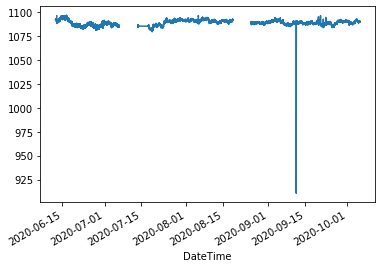

In [0]:

df_v2.loc[df_v2['Month'].isin(['June','July','August','September','October'])]['MelterBottom'].plot()

In [0]:
import plotly.express as px
col = "MelterBottom"
fig = px.box(df_v2, x="Month", y=col,
                 title="Distribution of " + col + " across Months (2020 onwards)"
                )
fig.show()